In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], test_size=0.1, random_state=0)

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print(X_train.shape, y_train.shape)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

((63000, 784), (63000,))


In [3]:
# Cross validation

from sklearn.model_selection import cross_val_score
#splitting the training instance into k-folds, 
#A model is trained using k-1 of the folds as training data
#he resulting model is validated on the remaining part of the data
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/Users/sashank/Documents/machine-learning/env/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 0.94862149,  0.9617619 ,  0.96037907])

In [5]:
# Confusion Matrix


# cross val predict performs k-fold cross-validation, but instead of returning the evaluation scores, it returns prediction ma
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
print(y_train_pred)


from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train_5, y_train_pred)
print("Confusion Matrix")
print(matrix)

[False False  True ..., False False False]
Confusion Matrix
[[55857  1481]
 [ 1233  4429]]


In [8]:
# Precision and Recall

from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train_5, y_train_pred))

print("Recall:", recall_score(y_train_5, y_train_pred))


('Precision:', 0.74940778341793568)
('Recall:', 0.78223242670434479)


In [9]:
# F1 score - harmonic mean of precision and recall

from sklearn.metrics import f1_score
print("F1 score:", f1_score(y_train_5, y_train_pred))

('F1 score:', 0.76546837193225037)


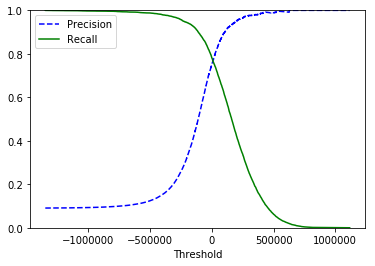

In [11]:
# Precision and recall curves

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

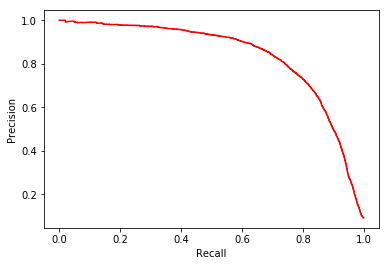

In [13]:
# Precision VS recall graph

plt.plot( recalls, precisions, "r-")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()